# Deep Learning with PyTorch - Part I
This notebook forms Part I of the practical examples and exercises accompanying the Seminar "Introduction to Deep Learning".<br><br>
This part gives an introduction into deep learning using the PyTorch framework.  
Any references in this notebook refer to the slides received during the seminar.  


For any claims and suggestions please refer to
* Jakob Gawlikowski (jakob.gawlikowski@dlr.de)
* Auliya Fitri (auliya.fitri@dlr.de)
<br><br>

***
**Part I** *(this notebook)*

| **Content Part I**         | 
| :-----------:              |
| 1) **Python and PyTorch**      | 
| 2) **Single Neuron**           |
| 3) **Activation functions**    |
| 4) **Single Neuron Regression & Classification** |
| 5) **Loss Functions**                            |
| 6) **Gradients and Backward Propagation**        |
| 7) **Optimizer**                               |

**Part II** *(in the afternoon)*:

| **Content Part II**   
| :-----------:              | 
|1) **Practical examples and excercises for training of neural networks** |
|2) **Regression Neural Networks** |
|3) **Classification Neural Network** |
|4) **Convolutional Neural Networks for image data** |

***

## 1. The PyTorch Library
PyTorch is a Deep Learning Library that offers a lot of implemented functionalites. Those functionalities are seperated into three modules:
* building a neural network: ```torch.nn```
* optimization: ```torch.optim```
* automatic differentiation: ```torch.autograd```

**Import needed packages into Python Environment**  
In order to work with PyTorch in our python environent, we have to import the PyTorch package which is called <i>torch</i>.

In [21]:
# Load Pytorch Package
import torch
from torch import nn, tensor   

# Packages for Data Generation and Visualization
import matplotlib.pyplot as plt

# customn functions for simple processing
from utils.printer import print_function    # plots a given function for a given range
from utils.printer import print_classification_regions
from utils.data_helper import get_cluster_data_set

import warnings
warnings.filterwarnings("ignore")

PyTorch is build up on so-called *tensors*, which can be of any dimension. For these tensors PyTorch offers multiple pre-implemented functionalities, including basic calculus. The functionalities can be applied on the whole tensor (e.g., vector multiplication) or elementwise (e.g. sums and differences):

In [22]:
a = torch.tensor([1,2,3])
b = torch.tensor([3,2,1])



print("a:     ", a)
print("b:     ", b)
print()
print("Shape of a:     ", a.shape)
print("Shape of b:     ", b.shape)
print()

a_plus_b = a+b
print("Addition        (a+b):   ", a_plus_b)

a_minus_b = a-b
print("Subtraction     (a-b):   ", a_minus_b)

a_divided_by_b = a/b
print("Division        (a/b):   ", a_divided_by_b)

a_times_b = a*b
print("Multiplication  (a*b):   ", a_times_b)

a_to_the_power_of_b = a**b
print("Exponentials    (a**b):  ", a_to_the_power_of_b)

inner_product = a@b
print("Inner product   (a@b):   ", inner_product)
print("... ")


a:      tensor([1, 2, 3])
b:      tensor([3, 2, 1])

Shape of a:      torch.Size([3])
Shape of b:      torch.Size([3])

Addition        (a+b):    tensor([4, 4, 4])
Subtraction     (a-b):    tensor([-2,  0,  2])
Division        (a/b):    tensor([0.3333, 1.0000, 3.0000])
Multiplication  (a*b):    tensor([3, 4, 3])
Exponentials    (a**b):   tensor([1, 4, 3])
Inner product   (a@b):    tensor(10)
... 


Everything works the same way for two-dimensional tensors.

In [23]:
a = torch.tensor([[1,2,3],[0,0,0]])
b = torch.tensor([[3,2,1], [3,2,1]])
print("a:     ", str(a).replace("\n", "").replace(" ", ""))
print("b:     ", str(b).replace("\n", "").replace(" ", ""))
print()
print("Shape of a:     ", a.shape)
print("Shape of b:     ", b.shape)
print()
a_plus_b = a+b
print("Addition        (a+b):   ", str(a_plus_b).replace("\n", "").replace(" ", ""))

a_minus_b = a-b
print("Subtraction     (a-b):   ", str(a_minus_b).replace("\n", "").replace(" ", ""))

a_divided_by_b = a/b
print("Division        (a/b):   ", str(a_divided_by_b).replace("\n", "").replace(" ", ""))

a_times_b = a*b
print("Multiplication  (a*b):   ", str(a_times_b).replace("\n", "").replace(" ", ""))

a_to_the_power_of_b = a**b
print("Exponentials    (a**b):  ", str(a_to_the_power_of_b).replace("\n", "").replace(" ", ""))

a_transposed = a.T
print("Transpose       (a.T):   ", str(a.T).replace("\n", "").replace(" ", ""))

matrix_product = a.T@b
print("Matrix product  (a.T@b): ", str(a.T@b).replace("\n", "").replace(" ", ""))
print("... ")


a:      tensor([[1,2,3],[0,0,0]])
b:      tensor([[3,2,1],[3,2,1]])

Shape of a:      torch.Size([2, 3])
Shape of b:      torch.Size([2, 3])

Addition        (a+b):    tensor([[4,4,4],[3,2,1]])
Subtraction     (a-b):    tensor([[-2,0,2],[-3,-2,-1]])
Division        (a/b):    tensor([[0.3333,1.0000,3.0000],[0.0000,0.0000,0.0000]])
Multiplication  (a*b):    tensor([[3,4,3],[0,0,0]])
Exponentials    (a**b):   tensor([[1,4,3],[0,0,0]])
Transpose       (a.T):    tensor([[1,0],[2,0],[3,0]])
Matrix product  (a.T@b):  tensor([[3,2,1],[6,4,2],[9,6,3]])
... 


## 2. A Single Neuron
 <img src="res/single_neuron.png" width="400">

PyTorch offers implementations of basic neural network layers and hence single neurons do not have to be implemented by hand.  
The following part is only for a better general understanding of the concepts of Neural Networks.  
For this we consider inputs $x\in\mathbb{R}^4$ and weights $w\in\mathbb{R}^4$.  

We consider two diferent inputs 
$$x_1=\begin{pmatrix}1\\2\\3\\4\end{pmatrix}\in \mathbb{R}^4 \qquad x_2=\begin{pmatrix}1\\1\\1\\1\end{pmatrix}\in \mathbb{R}^4$$
and two different weights
$$w_1=\begin{pmatrix}-1\\~~~1\\-1\\~~~1\end{pmatrix}\in \mathbb{R}^4 \qquad w_2=\begin{pmatrix}1\\1\\1\\1\end{pmatrix}\in \mathbb{R}^4 \qquad .$$
As stated in Slide 33, data is processed by the neuron in the following way:
$$\begin{align*}
&x_1^Tw_1 =&-1+2-3+4 &=& 2\\ 
&x_2^Tw_1 =&1-1+1-1 &=& 0\\
&x_1^Tw_2 =&1+2+3+4 &=& 10\\ 
&x_2^Tw_2 =&1+1+1+1 &=& 4
\end{align*}$$

Using PyTorch the matrix multiplication can either be realized with the ```torch.matmul``` function or in a more compact way by using the operator @.

In [24]:
## Weights without bias value
w1 = tensor([-1, 1, -1, 1], dtype=torch.float32)
w2 = tensor([1, 1, 1, 1], dtype=torch.float32)

# x values
x1 = tensor([1,2,3,4], dtype=torch.float32)
x2 = tensor([1,1,1,1], dtype=torch.float32)

# Vector / Matrix multiplication
y11=x1@w1.T
y21=x2@w1.T
y12=x1@w2.T
y22=x2@w2.T

print(f"Output for input 1 and weights 1: {y11.item()}")
print(f"Output for input 2 and weights 1: {y21.item()}")
print("")
print(f"Output for input 1 and weights 2: {y12.item()}")
print(f"Output for input 2 and weights 2: {y22.item()}")


Output for input 1 and weights 1: 2.0
Output for input 2 and weights 1: 0.0

Output for input 1 and weights 2: 10.0
Output for input 2 and weights 2: 4.0


As stated on Slide 34 we can also add bias term, which is added to the result. Let's consider the terms $b_1=1~$ and $~b_2=-4~$ leads to the following results

In [25]:
b1=1
b2=-4

print((x1@w1 + b1).item())
print((x2@w1 + b1).item())
print((x1@w2 + b2).item())
print((x2@w2 + b2).item())

3.0
1.0
6.0
0.0


<img src="res/single_neuron_bias.png" width="400">
As stated on slide 35 the bias term can be included into the weight vector by adding a $1$ to the inputs 

In [26]:
# Weights without bias value
w1 = torch.tensor([-1, 1, -1, 1, b1], dtype=torch.float32)
w2 = torch.tensor([1, 1, 1, 1, b2], dtype=torch.float32)

# Itorch.uts
x1 = torch.tensor([1, 2, 3, 4, 1], dtype=torch.float32)
x2 = torch.tensor([4, 3, 2, 1, 1], dtype=torch.float32)

# do vector multiplication of itorch.ut vector and (transposed) weight vector
y11=x1@w1.T
y21=x2@w1.T
y12=x1@w2.T
y22=x2@w2.T

print(y11.item())
print(y21.item())
print(y12.item())
print(y22.item())

3.0
-1.0
6.0
6.0


## 3. Activation Functions / Non-Linearities
In PyTorch the most common activation functions are pre-installed and can be found in <b><i>torch.nn</i></b> . 

Popular functions are for example given by <br>
<code>
&emsp;&emsp;relu = nn.ReLU()<br>
&emsp;&emsp;leaky_relu = nn.LeakyReLU(0.1)<br>
&emsp;&emsp;sigmoid = nn.Sigmoid()<br>
&emsp;&emsp;tanh = nn.Tanh()<br>
</code>


An overview over all pre-implemented activations cna be found here:<br>
* https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity <br>
* https://pytorch.org/docs/stable/nn.html#non-linear-activations-other

**Ploting popular Activation Functions**

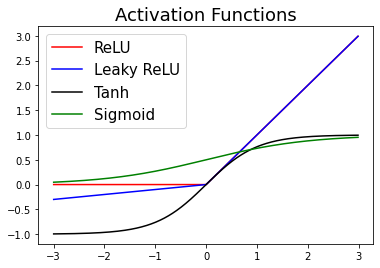

In [27]:
relu = nn.ReLU()
leaky_relu = nn.LeakyReLU(0.1)
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()
    
print_function(relu, name="ReLU", color="red", title="Activation Functions")
print_function(leaky_relu, name="Leaky ReLU", color="blue", title="Activation Functions")
print_function(tanh, name="Tanh", color="black", title="Activation Functions")
print_function(sigmoid, name="Sigmoid", color="green", title="Activation Functions")

Applying these activation functions to our neurons defined above leads to the following outputs:

In [28]:
print(f"|  Weights 1 |        || ReLU     | Leaky ReLU            | Sigmoid                     |Tanh          ")
print(f"|------------|--------------------------------------------------------------------------------------------------------")
print(f"|  Output 1: |{y11:<8}|| {relu(y11):<8} | {leaky_relu(y11).item():<20}  | {sigmoid(y11):<20}        | {tanh(y11):<20} ")
print(f"|  Output 2: |{y21:<8}|| {relu(y21):<8} | {leaky_relu(y21).item():<20}  | {sigmoid(y21):<20}        | {tanh(y21):<20} ")
print()
print(f"|  Weights 2 |        || ReLU     | Leaky ReLU            | Sigmoid                     |Tanh          ")
print(f"|------------|--------------------------------------------------------------------------------------------------------")
print(f"|  Output 1: |{y12:<8}|| {relu(y12):<8} | {leaky_relu(y12).item():<20}  | {sigmoid(y12):<20}        | {tanh(y12):<20} ")
print(f"|  Output 2: |{y22:<8}|| {relu(y22):<8} | {leaky_relu(y22).item():<20}  | {sigmoid(y22):<20}        | {tanh(y22):<20} ")



|  Weights 1 |        || ReLU     | Leaky ReLU            | Sigmoid                     |Tanh          
|------------|--------------------------------------------------------------------------------------------------------
|  Output 1: |3.0     || 3.0      | 3.0                   | 0.9525741338729858          | 0.9950547814369202   
|  Output 2: |-1.0    || 0.0      | -0.10000000149011612  | 0.2689414322376251          | -0.7615941762924194  

|  Weights 2 |        || ReLU     | Leaky ReLU            | Sigmoid                     |Tanh          
|------------|--------------------------------------------------------------------------------------------------------
|  Output 1: |6.0     || 6.0      | 6.0                   | 0.9975274205207825          | 0.9999877214431763   
|  Output 2: |6.0     || 6.0      | 6.0                   | 0.9975274205207825          | 0.9999877214431763   


In Pytorch operators can not only be applied to scalers, but also to tensors in a point-wise way.

In [29]:
x = torch.stack([x1,x2])
w = torch.stack([w1, w2])
y = x@w.t()

print("y tensor:\n",y)
print()
print("ReLU activation:\n", relu(y))
print("Sigmoid activation:\n", sigmoid(y))
print("Tanh activation:\n", tanh(y))

y tensor:
 tensor([[ 3.,  6.],
        [-1.,  6.]])

ReLU activation:
 tensor([[3., 6.],
        [0., 6.]])
Sigmoid activation:
 tensor([[0.9526, 0.9975],
        [0.2689, 0.9975]])
Tanh activation:
 tensor([[ 0.9951,  1.0000],
        [-0.7616,  1.0000]])


## 4. 'Neural Networks' with one Neuron  
### Regression

In [30]:
import random

seed = 1
random.seed(seed)
torch.manual_seed(seed);

**Create the data**  
Let's prepare a <b>one-dimensional float tensor</b> ``X`` of size ``N`` with values evenly spaced from -1 to 1 using ``torch.linspace`` as our training data.

In [31]:
N = 150  # number of samples
X_reg = torch.unsqueeze(torch.linspace(-1, 1, N), dim=1) # training data
y = X_reg**3 + 0.1 * torch.normal(0,1,X_reg.size())

print("Shapes of the data:")
print("X:", tuple(X_reg.size()))
print("y:", tuple(y.size()))

Shapes of the data:
X: (150, 1)
y: (150, 1)


Let's plot the data

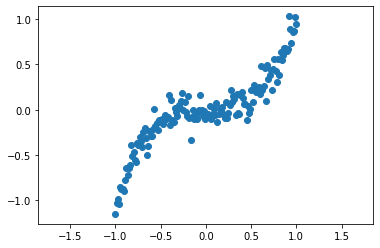

In [32]:
plt.scatter(X_reg.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

**Linear Approximation**  
We want to approximate the function $f:\mathbb{R}\rightarrow\mathbb{R}$ by single neuron. Hence, the regression model is of the form
$$f(x)=w\cdot x +b\quad,$$
where $w\in\mathbb{R}$ and $b\in\mathbb{R}$ are the learnable model parameters.

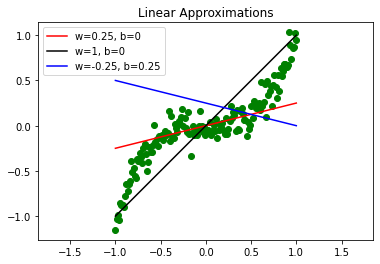

In [33]:
plt.scatter(X_reg, y, c="green")

b = 0
w = 0.25
f = lambda x: w*x + b
plt.plot(X_reg, f(X_reg), c="red", label=f"w={w}, b={b}")

b = 0
w = 1
f = lambda x: w*x + b
plt.plot(X_reg, f(X_reg), c="black", label=f"w={w}, b={b}")

b = 0.25
w = -0.25
f = lambda x: w*x + b
plt.plot(X_reg, f(X_reg), c="blue", label=f"w={w}, b={b}")

plt.title("Linear Approximations")
plt.legend()
plt.axis('equal');


**Non-Linear Approximation**  
We want to approximate the function $f:\mathbb{R}\rightarrow\mathbb{R}$ by single neuron followed by an *activation function*. Hence, the regression model is of the form
$$f(x)=\sigma (w\cdot x +b)\quad,$$
where $w\in\mathbb{R}$ and $b\in\mathbb{R}$ are the learnable model parameters.

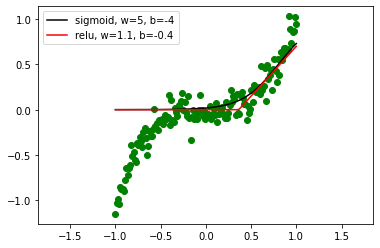

In [34]:
plt.scatter(X_reg, y, c="green")

relu = nn.ReLU()
sigmoid = nn.Sigmoid()

b = -4
w = 5
f = lambda x: w*x + b
plt.plot(X_reg, sigmoid(f(X_reg)), c="black", label=f"sigmoid, w={w}, b={b}")

b = -0.4
w = 1.1
f = lambda x: w*x + b
plt.plot(X_reg, relu(f(X_reg)), c="red", label=f"relu, w={w}, b={b}")

plt.legend()
plt.axis('equal');

### Classification
Let's get some two-dimensional data set laying in the interval ```[-8,8]x[-8,8]``` and plot it.

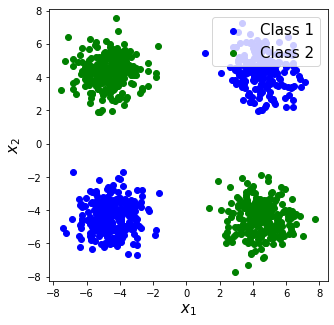

In [35]:
X_class, Y_class = get_cluster_data_set()

fig, ax = plt.subplots(1,1,figsize=(5, 5))
print_classification_regions(X_class, Y_class, ax=ax);


### Classification with Linear Classifiers

Linear classifiers on the 2-dimensional plane can be described by a function of the form $$f(x_1,x_2)=w_1\cdot x_1 + w_2\cdot x_2 + b,$$
where $w_1,w_2$ and $b$ are the parameters that describe the function. <br><br>
The classification is then realized by
$$\text{prediction}~~y=\begin{cases}\text{Class 1} \quad \text{if}\quad f(x_1,x_2)<0 \\ \text{Class 2} \quad \text{if}\quad f(x_1,x_2)>0\end{cases}$$

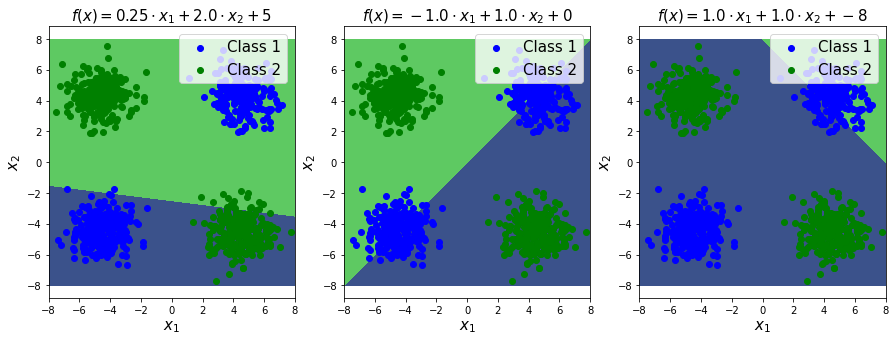

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))

w = torch.tensor([0.25,2])
b = 5
print_classification_regions(X_class, Y_class, f=lambda x: w@x +b, ax=ax1, title=f"$f(x)={w[0].item()}\cdot x_1+{w[1].item()}\cdot x_2+{b}$");

w = torch.tensor([-1.,1.])
b = 0
print_classification_regions(X_class, Y_class, f=lambda x: w@x +b, ax=ax2, title=f"$f(x)={w[0].item()}\cdot x_1+{w[1].item()}\cdot x_2+{b}$");

w = torch.tensor([1.,1.])
b = -8
print_classification_regions(X_class, Y_class, f=lambda x: w@x +b, ax=ax3, title=f"$f(x)={w[0].item()}\cdot x_1+{w[1].item()}\cdot x_2+{b}$");

## 5. Loss Functions
PyTorch comes with a wide range of loss functions. The loss functions are part of the neural network component ```torch.nn```. <br><br>
An overview over all available loss functions can be found here: https://pytorch.org/docs/stable/nn.html#loss-functions
<br><br>
The maybe most basic loss functions are the
* Mean-Sqaured-Error: ```torch.nn.MSELoss()```
* Cross-Entropy-Loss: ```torch.nn.CrossEntropy()```
*


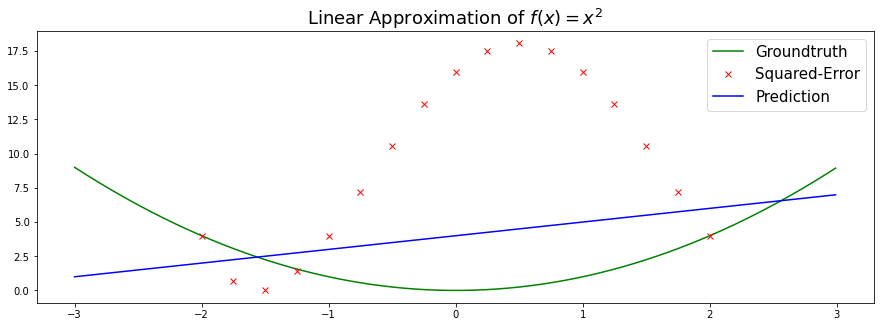

In [37]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5))

mse_loss = torch.nn.MSELoss(reduce=False)

x_in = torch.range(-2,2,0.01)
y_target = lambda x: x**2
y_pred = lambda x: x+4

loss = mse_loss(target=y_target(x_in), input=y_pred(x_in))

print_function(y_target, ax=ax1, name="Groundtruth", color="green")
ax1.plot(torch.range(-2,2,0.25), loss[::25], "x", color="red", label="Squared-Error");
print_function(y_pred, ax=ax1, name="Prediction", color="blue", title="Linear Approximation of $f(x)=x^2$")


## 6. Gradients & Backpropagation

**Gradients**<br>
Pytorch offers automatic differentiation of tensors. For that the parameter ```requires_gradient``` has to be set to ```True```:

Gradient of $f(x_1)$:  tensor(2.)
Gradient of $f(x_2)$:  tensor(-4.)


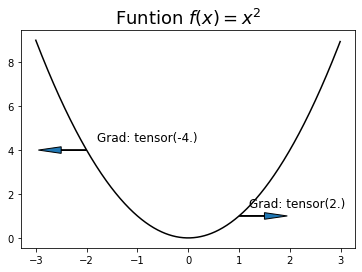

In [38]:
plt.clf()
def f(x):
    return x**2

print_function(f, title="Funtion $f(x)=x^2$")

x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(-2.0, requires_grad=True)

f_x1 = f(x1)
f_x1.backward()
print("Gradient of $f(x_1)$: ", x1.grad)
plt.annotate("Grad: " + str(x1.grad), xy=(x1,f(x1)), xytext=(x1+0.2,f(x1)+0.4), fontsize=12)
plt.arrow(x1.detach(), f(x1).detach(), 0.5*torch.sign(x1.grad.detach()), 0, head_width = 0.3);

f_x2 = f(x2)
f_x2.backward()
print("Gradient of $f(x_2)$: ", x2.grad)
plt.annotate("Grad: " + str(x2.grad), xy=(x1,f(x1)), xytext=(x2+0.2,f(x2)+0.4), fontsize=12)
plt.arrow(x2.detach(), f(x2).detach(), 0.5*torch.sign(x2.grad.detach()), 0, head_width = 0.3);

## 7. Optimization
The core of the optimization procedure in PyTorch is placed in the ```torch.optim``` module: https://pytorch.org/docs/stable/optim.html
<br><br>
It contains different types of optimization algorithms which can be used out-of-the-box to train a neural network. The most commonly used optimizers are
* Adam Algorithm (```torch.optim.Adam```)
* Stochastic Gradient Descent (```torch.optim.SGD```)

A list of all available optimizers can be found here: <br>
https://pytorch.org/docs/stable/optim.html#algorithms
<br><br>
#### The Training Loop
For the training of a neural network a training loop has to be implemented. <br><br>The training loop iterates multiple times over the training data and updates the network parameters in order to better fit the predictions to the training data. 
The training loop contains the following parts:

| **The Training Loop**      | 
| :-----------:              |
| 1) Outer and inner loops that iterate over epochs and batches                 |
| <br>```for x,y in data_set:```                                                |
| 2) Set accumulated gradients to zero <br>```optimizer.zero_grad()```          |
| 3) Propagte sample through the network <br>```y_pred=model(x)```              |
| 4) Compute the loss <br>```loss = loss_function(y_true, y_pred)```            |
| 5) Backpropagate the gradients <br>```loss.backward()```                      |
| 6) Do an update step based on the chosen optimizer <br>```optimizer.step()``` |



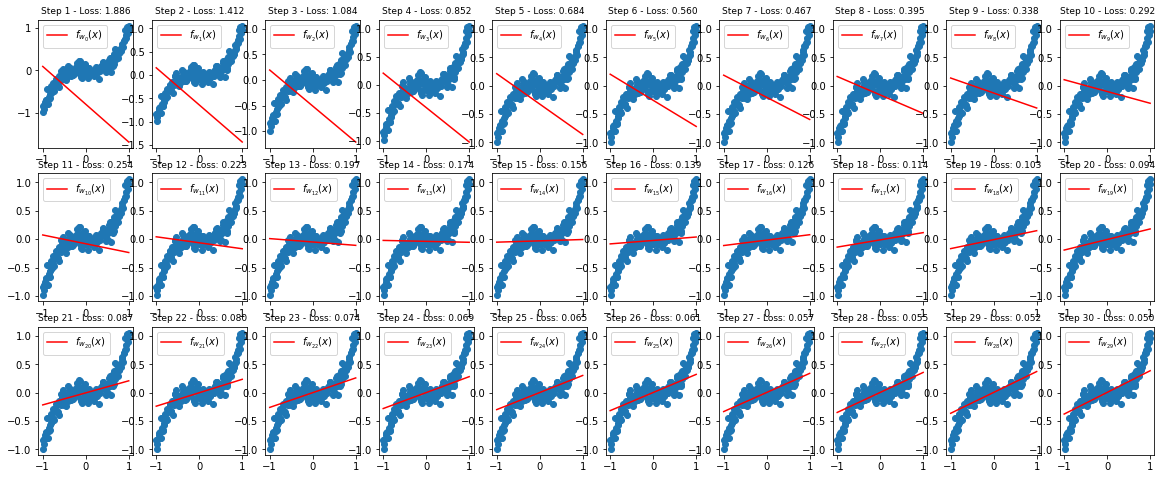

In [39]:
# Training Data Set and visualization
N = 150  # number of samples
X_reg = torch.unsqueeze(torch.linspace(-1, 1, N), dim=1)
y = X_reg.pow(3) + 0.1 * torch.normal(0,1,X_reg.size())

# 'Network' function
network = lambda x: w_para * x + b_para
# Initial value
w_para = torch.tensor(-1, requires_grad=True, dtype=float)
b_para = torch.tensor(-1, requires_grad=True, dtype=float)

# Learning rate / Step-size for Optimization
learning_rate = 0.1
# Chose *Stochastic Gradient Descent* algorithm as optimizer
optimizer = torch.optim.SGD(params=[w_para,b_para], lr=learning_rate)

# Number of optimiztion steps
steps = 30

# Loss function
loss_fn = torch.nn.MSELoss()


fig, ax = plt.subplots(3,10, figsize=(20,8))
###################################
###### EXAMPLE TRAINING LOOP ######
###################################
pred = network(X_reg)

# Step 0: Loop over number of steps (=epochs)
for i in range(steps):

    ax[i//10,i%10].scatter(X_reg.detach(), y.detach())

    # Step 2: Set accumulated gradients to zero
    optimizer.zero_grad()

    # Step 3: Propagate data through the 'network'
    pred = network(X_reg)

    # Step 4: Compute loss value
    loss_value = loss_fn(pred, y)
    x_from = X_reg.detach()

    # Step 5: Backpropagate Gradients
    loss_value.backward()

    # Step 6: Do optimization step
    optimizer.step()

    x_to = X_reg.detach()
    ax[i//10,i%10].set_title(f"Step {i+1} - Loss: %.3f" %loss_value.detach(), fontsize=9)
    ax[i//10,i%10].plot(torch.linspace(-1,1,600), network(torch.linspace(-1,1,600)).detach(), "red", label="$f_{w_{" + str(i) + "} }(x)$")
    ax[i//10,i%10].legend()
    

### Your Own Gradien Descent
This section forms a small add-on to visualize the working principles of optimization algorithms as the gradient descent.

The general idea behind iterative first order optimization procedures can be visualized by considering the *gradient descent* algorithm. For that consider the following notation: 

* $(x,y)\qquad~~$ pairs of input samples $x$ and corresponding labels $y$. 
* $f_w(x)\qquad~$ a neural network, parameterized with parameters $w$.
* $w\qquad\qquad$ the parameteres that should be adjusted during the training process.
* $w_k\qquad~~~~~~$ the model parameters at training iteration $k$.
* $\hat y=f_w(x)~~$ the neural network's prediction for input $x$.
* $\mathcal{L}(\hat y, y)\qquad$ the loss function evaluated for a given prediction $\hat y$ and the groundtruth $y$.
* $\nabla_w f_{w}(x)~~~~$ the gradient with respect to $w$.

The gradient descent algorithm iteratively makes steps in the optisite direction of the gradient, e.g., $-\nabla_\theta \mathcal{L}(f(x),y)$. For a chosen step-size, or learning-rate $\alpha>0$ the update is given by $$w_{k+1} = \theta_k-\alpha\cdot\nabla_w \mathcal{L}\left(f_{w_k}(x),y\right).$$

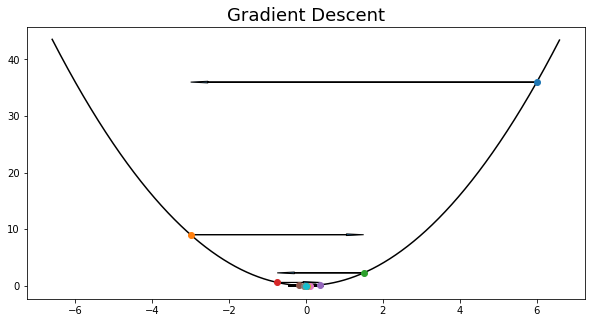

In [40]:

x_init = 6

learning_rate = 0.75
f = lambda x: x**2

fig, ax1 = plt.subplots(1,1, figsize=(10,5))

x = torch.tensor(x_init, requires_grad=True, dtype=float)  
print_function(f, title="Gradient Descent", start=-x.item()* 1.1, end=x.item()*1.1, ax=ax1)
for i in range(steps):
    x.requires_grad = True
    y = f(x)
    ax1.plot(x.detach(), y.detach(), "o")
    y.backward()
    ax1.arrow(x.detach(), f(x).detach(), -learning_rate * x.grad, 0, head_width = 0.3, length_includes_head=True);
    x = (x.detach() - learning_rate * x.grad.item())
